<a href="https://colab.research.google.com/github/owenlee20/msdia-portfolio/blob/main/GB881_HealthcareCompanySales_Lee_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GB881, HealthcareCompanySales, Owen Lee

In [ ]:
# Loading appropriate libaries...
import pandas as pd
import seaborn as sns

# sklearn is a useful library with functions helpful for analyzing regression.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Loading the data into a dataframe.
# hcc = Healthcare Company
df_hcc = pd.read_csv('http://bit.ly/ad_spend')

### Question 1: Determining dimensions of the dataset

In [ ]:
# The shape function can be used to view the dimensions of the dataframe.
df_hcc.shape

# From the result, there appear to be 200 records (rows).

(200, 4)

### Question 2: Listing datatypes for each column in the dataset

In [ ]:
# The info function can be used to view datatypes for each column in the dataframe.
df_hcc.info()

# From the result, the datatype for the 'sales' column is float64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Number Conversions: Changing the unit for advertizing costs from tens of thousands to millions...

In [ ]:
# This head function can be used to get an initial preview of the data and to observe that the units are in tens of thousands.
# df_hcc.head()

# The variable ad_columns denotes the columns with units to be converted. The for-loop parses through the specified columns and divides each value by 100.
ad_columns = ['TV', 'radio', 'newspaper']

for each_column in ad_columns:
  df_hcc[each_column] = df_hcc[each_column] / 100

# The head function can be used once again to confirm conversion has been completed successfully.
df_hcc.head()


,TV,radio,newspaper,sales
0,2.301,0.378,0.692,22.1
1,0.445,0.393,0.451,10.4
2,0.172,0.459,0.693,9.3
3,1.515,0.413,0.585,18.5
4,1.808,0.108,0.584,12.9


### Question 3: Determining the value of television ad spend (in millions) for the last row (8th record)

In [ ]:
# The head function can be used to preview the first 8 records (rows zero through seven).
df_hcc.head(8)

# The value for television ad spend in the last row is 1.202 million, or $1,202,000

,TV,radio,newspaper,sales
0,2.301,0.378,0.692,22.1
1,0.445,0.393,0.451,10.4
2,0.172,0.459,0.693,9.3
3,1.515,0.413,0.585,18.5
4,1.808,0.108,0.584,12.9
5,0.087,0.489,0.750,7.2
6,0.575,0.328,0.235,11.8
7,1.202,0.196,0.116,13.2


### Question 4: Determining the minimum value in the sales column

In [ ]:
# The describe function can be used to generate descriptive statistics and find the minimum value in a column.
df_hcc.describe()

# The minimum value for sales appears to be 1.60 million, or $1,600,000

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,1.470425,0.232640,0.305540,14.022500
std,0.858542,0.148468,0.217786,5.217457
min,0.007000,0.000000,0.003000,1.600000
25%,0.743750,0.099750,0.127500,10.375000
50%,1.497500,0.229000,0.257500,12.900000
75%,2.188250,0.365250,0.451000,17.400000
max,2.964000,0.496000,1.140000,27.000000


### Generating a histogram to visualize distribution of data in the sales column...

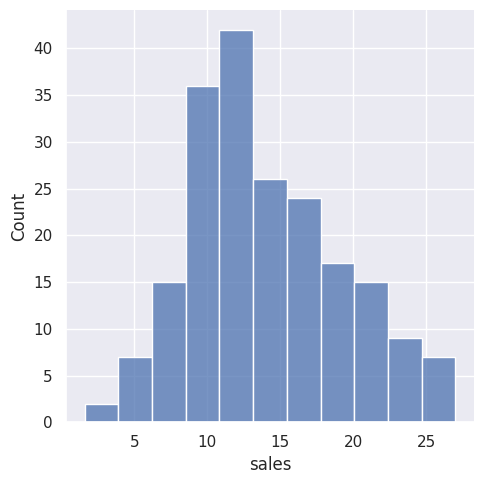

In [ ]:
# The code below generates a visual distribution of the specified data.

# First, style preferences are applied to help better visualize the data with the code below.
sns.set(style = "darkgrid")

sns.displot(df_hcc, x = "sales")

### Question 5: Determining if sales tend to center around 20 million
##### The answer is false, because upon observation of the distribution, the sales tend to center around just over 10 million.

### Creating new columns to sum the total ad spending between TV, radio and newspaper columns and to generate an ROI as a result of marketing investments...

In [ ]:
# Creating a new column for total ad spend and setting total to 0.0 to begin (using floats).
df_hcc['total_ad_spend'] = 0.0

# Summing each of the 3 'ad spend' columns and assigning the sum to the new column for each row (axis 1 means moving horizontally)
df_hcc['total_ad_spend'] = df_hcc[ad_columns].sum(axis = 1)

# Creates a new column and uses a calculation and values from the previously generated column to yield ROI.
# Sales growth = sales, and marketing investment = total_ad_spend
df_hcc['roi_percent'] = ((df_hcc['sales'] - df_hcc['total_ad_spend']) / df_hcc['total_ad_spend']) * 100

# The updated dataset can be previewed with the head function to confirm changes were made.
df_hcc.head()

,TV,radio,newspaper,sales,total_ad_spend,roi_percent
0,2.301,0.378,0.692,22.1,3.371,555.591813
1,0.445,0.393,0.451,10.4,1.289,706.826998
2,0.172,0.459,0.693,9.3,1.324,602.416918
3,1.515,0.413,0.585,18.5,2.513,636.171906
4,1.808,0.108,0.584,12.9,2.500,416.000000


### Question 6: Determining the ROI value in the first row

In [ ]:
# The head function can be used to preview the first row (row zero) and more.
df_hcc.head()

# The first row contains the value 556 (rounded to whole number) for the roi_percent column.

,TV,radio,newspaper,sales,total_ad_spend,roi_percent
0,2.301,0.378,0.692,22.1,3.371,555.591813
1,0.445,0.393,0.451,10.4,1.289,706.826998
2,0.172,0.459,0.693,9.3,1.324,602.416918
3,1.515,0.413,0.585,18.5,2.513,636.171906
4,1.808,0.108,0.584,12.9,2.500,416.000000


### Generating a scatterplot of the data to show the relationship between TV advertizing spend and sales

<Axes: xlabel='TV', ylabel='sales'>

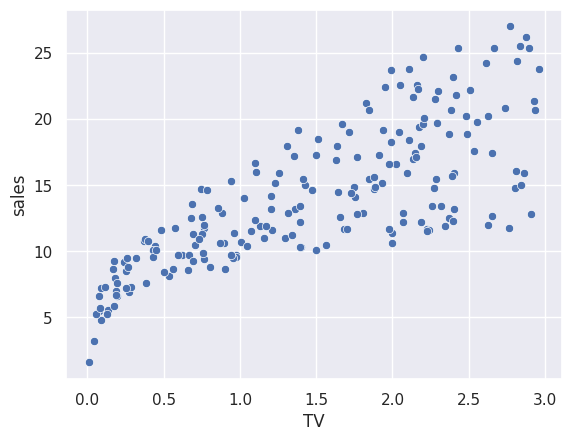

In [ ]:
# The code below generates a scatterplot for the analysis described above.
sns.scatterplot(df_hcc, x = 'TV', y = 'sales')

# As TV advertizing spend goes up, sales tend to go up as well.

### Question 7: Determining if there is a positive relationship between TV ad spend and sales
##### Upon observation of the scatterplot, it appears there is a strong positive correlation between the two variables; therefore the answer to this question is true.

### Generating a pairplot and matrix to show relationships between all fields except the newly created columns

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


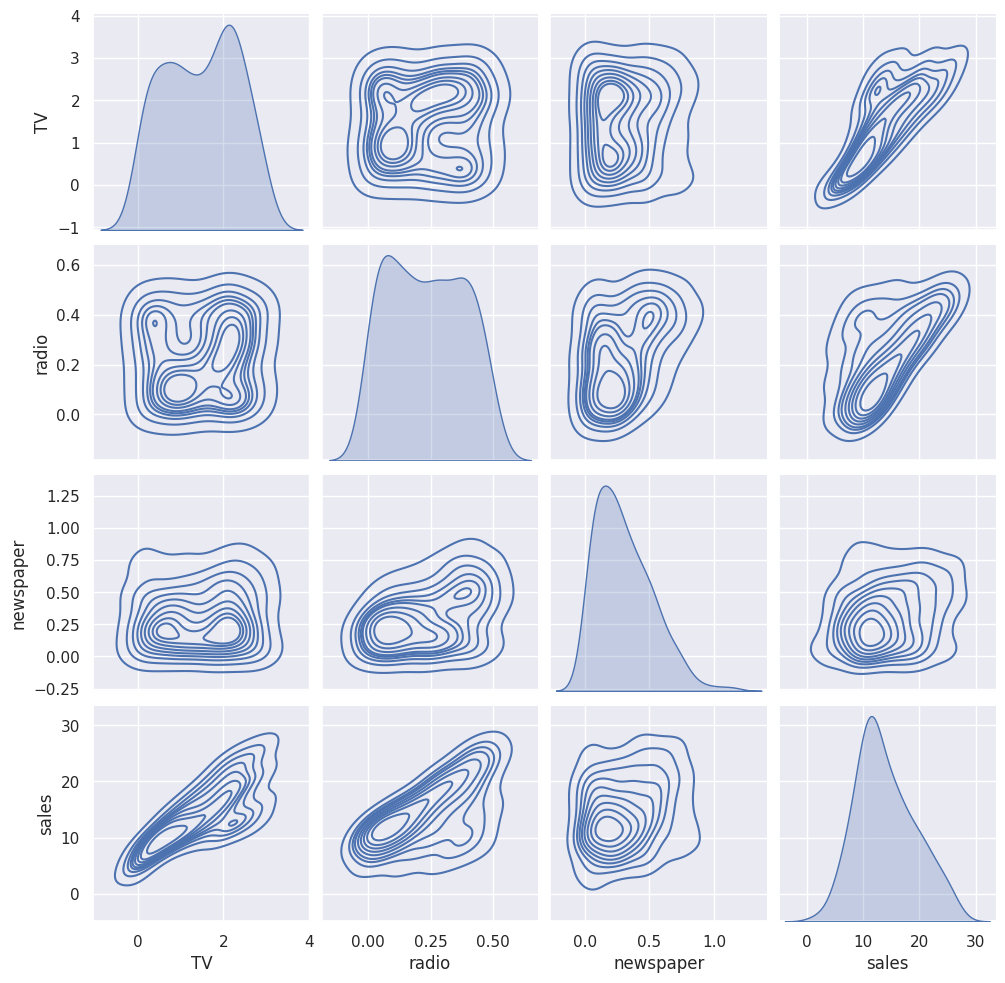

In [ ]:
# Creating a unique dataframe that contains only the specified columns...
 # df_hcc_wo_col means dataframe_healthcarecompany_without_columns
df_hcc_wo_col = df_hcc.drop(columns = ['total_ad_spend', 'roi_percent'])

# Head function can confirm columns were dropped for the new temporary dataframe.
# df_hcc_wo_col.head()

# Generating a pairplot...
sns.pairplot(df_hcc_wo_col, kind="kde");

# Generating the correlation matrix table...
df_hcc_wo_col.corr()

# Upon viewing the resulting visuals, the code successfully omitted the specified columns.

### Question 8: Determining the correlation coefficient for the relationship between newspaper ad spend and sales
##### From the matrix generated above, the coefficient for these variables appears to be 0.228 (rounded to three decimals).

### Question 9: Determing if there is a strong relationship between newspaper ad spend and sales
##### From the pairplot generated above and the answer to question 8, it does not appear that there is a strong relationship; Instead, the relationship is  weak, although it is positive. Therefore the answer to this question is false.

### Prepare for modeling...

In [ ]:
# Dropping rows with null values...
df_hcc_wo_col = df_hcc_wo_col.dropna()

In [ ]:
# Separating the independent (x) variables and dependent (y) variable...
x = df_hcc_wo_col[['TV', 'radio']]
y = df_hcc_wo_col['sales']

In [ ]:
# Pulling out some of the data (25%) and create a test dataset...
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# Training the prediction model using the training dataset...
hccmodel = LinearRegression()
hccmodel.fit(x_train.values, y_train)

LinearRegression()

In [ ]:
# Getting the coefficients and y-intercept for the model...
# The code below displays the y-intercept and coefficients of the regression model.
print(hccmodel.intercept_)
print(hccmodel.coef_)

# 19.947 (rounded to 3 decimals) is the coefficient for 'radio'.
# 2.911 (rounded to 3 decimals) is the intercept.

2.9109237322037913
[ 4.41972877 19.94695311]


### Question 10: Determining the coefficient for 'radio' in the regression equation generated above
##### The coefficient for radio appears to be 19.947 (rounded to 3 decimals).

### Question 11: Determining the y-intercept in the regression equation generated above
##### The y-intercept calculated is 2.911 (rounded to 3 decimals)

### Question 12: Predicting sales under specific conditions using the generated model

In [ ]:
# From the question, the conditions provided are TV = 0.5, radio = 0.5
# Predicting income for a specific scenario..
new_values = [[0.5, 0.5]]
hccmodel.predict(new_values)

# The predicted sales with the specified conditions appears to be 15.094 million, or $15,094,000.

array([15.09426467])

### Question 13: Making predictions in the test data

In [ ]:
# First, making predictions in the test data using the predict function...
y_prediction = hccmodel.predict(x_test.values)

# Metrics can be used to evaluate the performance of the model (r-squared).
metrics.r2_score(y_test, y_prediction)

# The calculated r-squared value appears to be 0.858 (rounded to 3 decimals).

0.8580883042722334